In [1]:
import pandas as pd
physchem_final_data = pd.read_csv("Chembl_pIC50_physchem.csv")
physchem_final_data.head()

,SMILES,pIC50,weight,logp,h_bond_donor,h_bond_acceptors,rotatable_bonds,atoms,heavy_atoms,molar_refractivity,topological_polar_surface_area,formal_charge,rings
0,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5.301030,311.135528,3.3188,1.0,2.0,3.0,21.0,21.0,79.7385,46.17,0.0,3.0
1,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,5.568636,299.101371,3.2412,1.0,3.0,3.0,19.0,19.0,77.6575,46.17,0.0,3.0
2,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,5.744727,311.135528,3.3188,1.0,2.0,3.0,21.0,21.0,79.7385,46.17,0.0,3.0
3,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,4.958607,327.105978,3.8331,1.0,2.0,3.0,21.0,21.0,84.7905,46.17,0.0,3.0
4,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,5.000000,371.055462,3.9422,1.0,2.0,3.0,21.0,21.0,87.4805,46.17,0.0,3.0


In [2]:
physchem_final_data_x=physchem_final_data.drop(["pIC50","SMILES"],axis=1)
physchem_final_data_y=physchem_final_data['pIC50']

In [3]:
from sklearn.model_selection import train_test_split
physchem_X_train, physchem_X_test, physchem_y_train, physchem_y_test = train_test_split(physchem_final_data_x, physchem_final_data_y, test_size=0.33, random_state=42)

In [4]:
physchem_final_data_train = pd.concat([physchem_X_train,physchem_y_train],axis=1)
physchem_final_data_train.head()

,weight,logp,h_bond_donor,h_bond_acceptors,rotatable_bonds,atoms,heavy_atoms,molar_refractivity,topological_polar_surface_area,formal_charge,rings,pIC50
365,417.994569,3.99170,1.0,6.0,3.0,27.0,27.0,108.2388,63.83,0.0,4.0,7.494850
77,477.148905,3.62420,0.0,5.0,5.0,32.0,32.0,124.7028,70.16,0.0,4.0,5.721246
84,468.148571,3.39760,1.0,5.0,5.0,31.0,31.0,115.2706,87.15,0.0,5.0,7.337242
661,409.136174,2.38042,2.0,7.0,4.0,29.0,29.0,97.5476,111.72,0.0,3.0,7.086186
82,456.148571,3.39760,1.0,5.0,5.0,30.0,30.0,112.8376,87.15,0.0,4.0,7.251812


In [5]:
from pycaret.regression import *
s = setup(physchem_final_data_train, target = 'pIC50', session_id = 123,normalize=True)

In [6]:
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:41:53
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


In [7]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [13]:
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Custom
ID,,,,,,,,
mae,MAE,MAE,<function mean_absolute_error at 0x00000220CBD...,neg_mean_absolute_error,pred,{},False,False
mse,MSE,MSE,<function mean_squared_error at 0x00000220CBD3...,neg_mean_squared_error,pred,{},False,False
rmse,RMSE,RMSE,<function mean_squared_error at 0x00000220CBD3...,neg_root_mean_squared_error,pred,{'squared': False},False,False
r2,R2,R2,<function r2_score at 0x00000220CBD32940>,r2,pred,{},True,False
rmsle,RMSLE,RMSLE,<function RMSLEMetricContainer.__init__.<local...,"make_scorer(root_mean_squared_log_error, great...",pred,{},False,False
mape,MAPE,MAPE,<function MAPEMetricContainer.__init__.<locals...,"make_scorer(mean_absolute_percentage_error, gr...",pred,{},False,False


In [14]:
results = pull()

In [15]:
results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.6234,0.7588,0.8648,0.5996,0.1241,0.1099,2.364
catboost,CatBoost Regressor,0.6293,0.7712,0.8686,0.5940,0.1248,0.1104,5.941
rf,Random Forest Regressor,0.6494,0.8047,0.8895,0.5772,0.1280,0.1148,2.326
knn,K Neighbors Regressor,0.6593,0.8344,0.8967,0.5619,0.1302,0.1185,1.037
lightgbm,Light Gradient Boosting Machine,0.6637,0.8476,0.9136,0.5509,0.1306,0.1162,3.607
gbr,Gradient Boosting Regressor,0.6982,0.9100,0.9438,0.5172,0.1354,0.1226,2.142
xgboost,Extreme Gradient Boosting,0.6911,0.9569,0.9694,0.4943,0.1389,0.1212,2.271
ada,AdaBoost Regressor,0.8646,1.1138,1.0512,0.4129,0.1524,0.1544,2.096
lr,Linear Regression,0.9127,1.3296,1.1484,0.2951,0.1659,0.1616,4.075
ridge,Ridge Regression,0.9215,1.3339,1.1515,0.2926,0.1667,0.1632,1.528


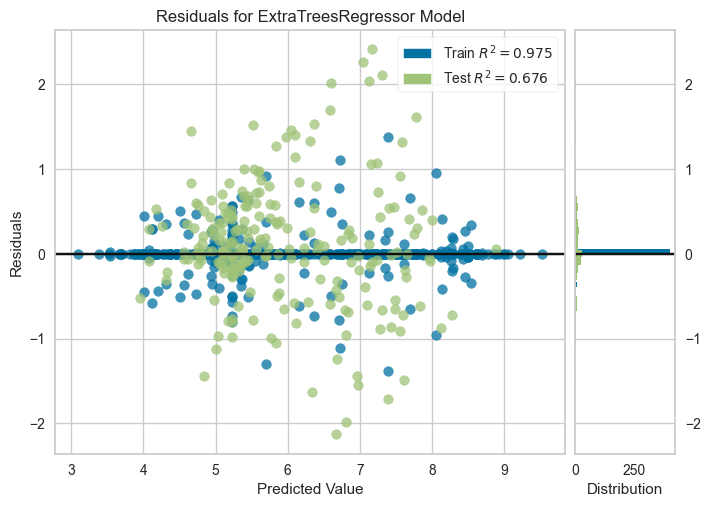

In [16]:
plot_model(best, plot = 'residuals')

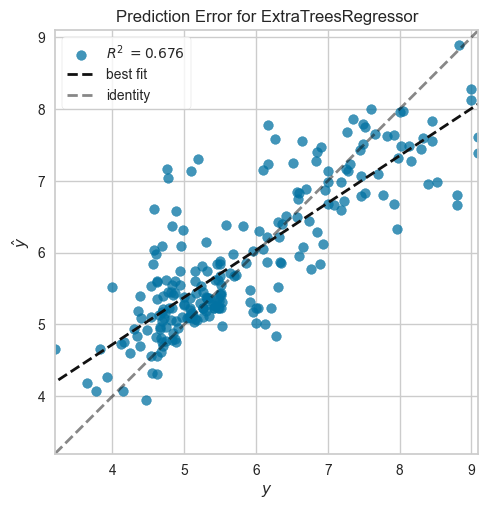

In [17]:
plot_model(best, plot = 'error')

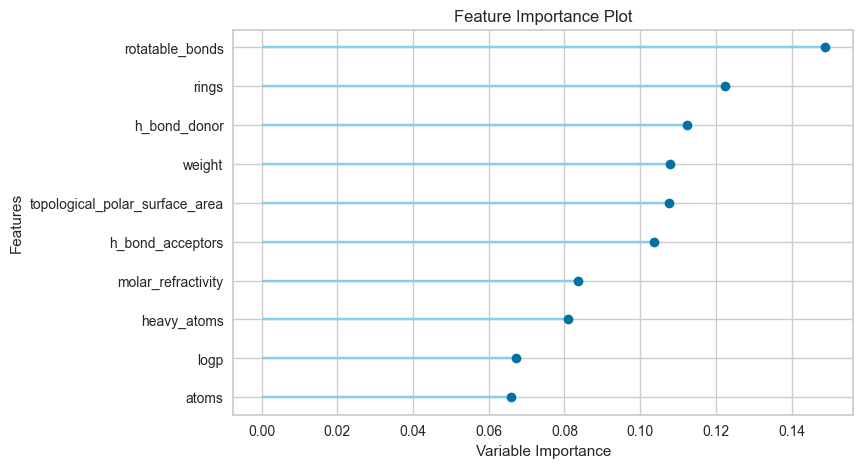

In [18]:
plot_model(best, plot = 'feature')

In [19]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [6]:
rf = create_model('rf')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:27:47
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6481,0.7640,0.8741,0.6920,0.1250,0.1137
1,0.5834,0.5526,0.7434,0.6228,0.1071,0.0995
2,0.6948,1.1704,1.0819,0.4662,0.1424,0.1107
3,0.7559,1.0820,1.0402,0.4469,0.1488,0.1337
4,0.5898,0.6086,0.7801,0.6390,0.1130,0.1036
5,0.6863,0.8699,0.9327,0.5918,0.1341,0.1261
6,0.7039,0.8754,0.9356,0.5378,0.1380,0.1272
7,0.5262,0.4988,0.7062,0.7192,0.0979,0.0872
8,0.6512,0.7428,0.8618,0.6137,0.1221,0.1126


In [ ]:
rf_results = pull()
# print(type(rf_results))
rf_results
